<a href="https://colab.research.google.com/github/ji-min000/b06/blob/feature%2FML/%EB%AA%85%EC%84%A0)%20%EB%AF%B8%EA%B5%AD%EC%A0%84%EC%9E%90%EC%83%81%EA%B1%B0%EB%9E%98_%EB%B0%B0%EC%86%A1%ED%98%95%ED%83%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%9D%BC%EB%B2%A8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 CSV 파일 불러오기 + 인코딩 수정
data = pd.read_csv("/content/drive/MyDrive/Ecommerce2020_Date.csv", encoding='windows-1252')
data.head(5)

,formatted_order_date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2020.1.1,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,2020.1.1,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,2020.1.1,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,2020.1.1,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,2020.1.1,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [ ]:
#범주형 데이터를 수치형 데이터로 변환
import pandas as pd

# 'Ship Mode' 열의 값을 수치형 데이터로 매핑
ship_mode_mapping = {'Same Day': 0, 'First Class': 1, 'Second Class': 2, 'Standard Class': 3}
data['Ship Mode'] = data['Ship Mode'].map(ship_mode_mapping)

# 'Segment' 열의 값을 수치형 데이터로 매핑
segment_mapping = {'Consumer': 0, 'Home Office': 1, 'Corporate': 2}
data['Segment'] = data['Segment'].map(segment_mapping)

# 매핑된 데이터 값 불러오기
data.head(5)

,formatted_order_date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2020.1.1,849,CA-2017-107503,3,GA-14725,0,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,2020.1.1,4010,CA-2017-144463,3,SC-20725,0,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,2020.1.1,6683,CA-2017-154466,1,DP-13390,1,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,2020.1.1,8070,CA-2017-151750,3,JM-15250,0,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,2020.1.1,8071,CA-2017-151750,3,JM-15250,0,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 각 열을 순회하면서 라벨 인코딩 수행
label_encoder = LabelEncoder()
for column in ['City', 'State']:
    data[column] = label_encoder.fit_transform(data[column])

# 변환된 데이터 출력
data.head(5)

,formatted_order_date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2020.1.1,849,CA-2017-107503,3,GA-14725,0,United States,173,32,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,2020.1.1,4010,CA-2017-144463,3,SC-20725,0,United States,174,3,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,2020.1.1,6683,CA-2017-154466,1,DP-13390,1,United States,98,46,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,2020.1.1,8070,CA-2017-151750,3,JM-15250,0,United States,137,40,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,2020.1.1,8071,CA-2017-151750,3,JM-15250,0,United States,137,40,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

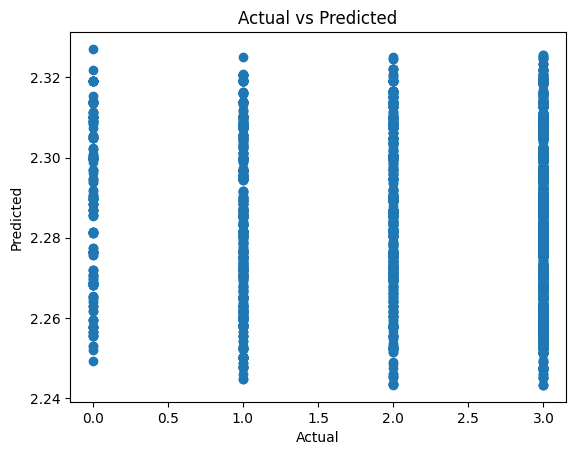

In [ ]:
# 독립 변수(X)와 종속 변수(y)로 데이터 분할
X = data[['Segment','City', 'State' ]]  # 독립 변수
y = data['Ship Mode']  # 종속 변수

# 선형 회귀 모델 초기화 및 학습
model = LinearRegression()
model.fit(X, y)

# 모델 예측값 계산
predictions = model.predict(X)

# 데이터와 예측값 시각화
plt.scatter(y, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

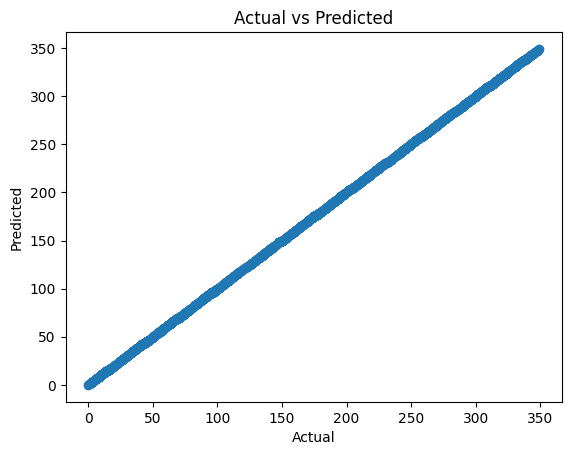

In [ ]:
# 독립 변수(X)와 종속 변수(y)로 데이터 분할
X = data[['Segment','City', 'State' ]]  # 독립 변수
y = data['City']  # 종속 변수

# 선형 회귀 모델 초기화 및 학습
model = LinearRegression()
model.fit(X, y)

# 모델 예측값 계산
predictions = model.predict(X)

# 데이터와 예측값 시각화
plt.scatter(y, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()